In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import numpy as np
import polars as pl
from sweep.experiment import Experiment, ExperimentType
from model.data import DataModel, KFeaturesDefinition, k_features_factory
from erm.problems.problems import ProblemType
import subprocess
from experiments.data_loading import read_result_dataframe
import os
import matplotlib.pyplot as plt
import datetime
from matplotlib.lines import Line2D
from scipy.special import erfc

Define a datamodel

In [22]:
d = 500

In [23]:
beta = 1.5
powerlaw_kwargs = {
    "x_diagonal": KFeaturesDefinition(diagonal=[(10e2 * i**-beta, 1) for i in range(1, d + 1)]),
    "θ_diagonal": KFeaturesDefinition(diagonal=[(1, d)]),
    "ω_diagonal": KFeaturesDefinition(diagonal=[(1, d)]),
    "δ_diagonal": KFeaturesDefinition(diagonal=[(1, d)]),
    "ν_diagonal": KFeaturesDefinition(diagonal=[(1, d)]),
}

powerlaw_datamodel = DataModel(
    d,
    normalize_matrices=True,
    data_model_factory=k_features_factory,
    factory_kwargs=powerlaw_kwargs,
    name="powerlaw"
)

Define an experiment

In [24]:
experiment = Experiment(
    state_evolution_repetitions=1,
    erm_repetitions=0,
    alphas=np.logspace(-0.2,3,10),
    epsilons=np.array([0.0, 0.1, 0.2]),
    lambdas=np.array([0.001]),
    taus=np.array([0.05]),
    d=d,
    experiment_type=ExperimentType.Sweep,
    data_models = [powerlaw_datamodel],
    test_against_epsilons=np.array([0.2]),
    erm_problem_type=ProblemType.Logistic,
    gamma_fair_error=0.01,
    name="powerlaw"
)
experiment_json = experiment.to_json()

In [25]:
with open("powerlaw.json", "w") as f:
    f.write(experiment_json)

In [26]:
command = ["pwd"]
subprocess.run(command)

/Users/kasimirtanner/Documents/LocalCode/Code_PDM/AISTATS


CompletedProcess(args=['pwd'], returncode=0)

In [27]:
# venv_python = ".venv/bin/python"
# command = ["mpiexec", "-n", "5", venv_python, "sweep/run_sweep.py", "--json", experiment_json, "--log-level", "INFO"]
# subprocess.run(command)

In [28]:
df = read_result_dataframe(experiment.name)

/Users/kasimirtanner/Documents/LocalCode/Code_PDM/AISTATS/experiments/data_loading.py:50: UserWarning: `to_struct()` should be passed a list of field names to avoid query errors in subsequent operations (e.g. <struct operation> not supported for dtype Unknown)
  df.with_columns(pl.col(column_list[i]).list.to_struct())


In [29]:
df

alpha,epsilon,tau,lam,epsilon_g,data_model_name,id,date,task_type,erm_problem_type,test_against_epsilons,d,values,gamma_fair_error,gamma,generalization_error,adversarial_generalization_errors,training_error,training_loss,test_losses,m,q,sigma,A,P,F,m_hat,q_hat,sigma_hat,A_hat,F_hat,P_hat,n_m,n_q,n_sigma,n_A,n_P,…,values_std,gamma_fair_error_std,gamma_std,generalization_error_std,adversarial_generalization_errors_std,training_error_std,training_loss_std,test_losses_std,m_std,q_std,sigma_std,A_std,P_std,F_std,m_hat_std,q_hat_std,sigma_hat_std,A_hat_std,F_hat_std,P_hat_std,n_m_std,n_q_std,n_sigma_std,n_A_std,n_P_std,n_F_std,angle_std,data_model_angle_std,data_model_attackability_std,data_model_adversarial_test_errors_std,sigmax_eigenvalues_std,sigmaθ_eigenvalues_std,xθ_eigenvalues_std,mu_usefulness_std,gamma_robustness_es_std,mu_margin_std,duration_std
f64,f64,f64,f64,f64,str,str,str,str,str,list[f64],f64,struct[0],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,struct[0],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,list[f64],list[f64],list[f64],f64,f64,f64,f64
1.430723,0.1,0.05,0.001,0.2,"""powerlaw""",null,null,null,null,null,500.0,{},0.01,1.0,0.087844,0.145581,6.0127e-23,1.003729,5.460578,12.736672,174.796205,46.246608,67.029912,67.029912,4.189498,0.09059,0.002204,0.006681,0.0,0.0,0.000313,12.736672,174.796205,46.246608,67.029912,67.029912,…,{},null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
1000.0,0.2,0.05,0.001,0.2,"""powerlaw""",null,null,null,null,null,500.0,{},0.01,1.0,0.044739,0.096838,0.044739,0.80412,0.804892,8.15135,67.605574,0.006914,17.746015,17.746015,3.63749,526.142283,64.345672,61.870531,0.0,0.0,5.995963,8.15135,67.605574,0.006914,17.746015,17.746015,…,{},null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
16.681005,0.0,0.05,0.001,0.2,"""powerlaw""",null,null,null,null,null,500.0,{},0.01,1.0,0.030973,0.150064,0.002712,0.022922,74.31958,22.76952,522.085795,6.316658,462.3204,462.3204,19.891793,3.149101,0.080567,0.13743,0.0,0.0,0.0,22.76952,522.085795,6.316658,462.3204,462.3204,…,{},null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
7.356423,0.2,0.05,0.001,0.2,"""powerlaw""",null,null,null,null,null,500.0,{},0.01,1.0,0.051899,0.114311,0.019187,2.684552,2.842277,10.641418,116.01427,1.514259,43.328254,43.328254,5.140224,3.394549,0.380124,0.307235,0.0,0.0,0.023344,10.641418,116.01427,1.514259,43.328254,43.328254,…,{},null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
16.681005,0.1,0.05,0.001,0.2,"""powerlaw""",null,null,null,null,null,500.0,{},0.01,1.0,0.033971,0.128843,0.012317,5.851015,19.368457,15.755793,250.467918,1.501508,158.217668,158.217668,11.433529,7.614698,0.555849,0.475905,0.0,0.0,0.009183,15.755793,250.467918,1.501508,158.217668,158.217668,…,{},null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
441.005945,0.0,0.05,0.001,0.2,"""powerlaw""",null,null,null,null,null,500.0,{},0.01,1.0,0.016419,0.158113,0.015277,0.035064,211.686848,34.679538,1202.868679,0.203037,1196.612966,1196.612966,34.527668,170.056423,4.78446,4.902657,0.0,0.0,0.0,34.679538,1202.868679,0.203037,1196.612966,1196.612966,…,{},null,null,null,nu

In [31]:
data_models = list(df["data_model_name"].unique())
epsilons = list(df["epsilon"].unique())
alphas = list(df["alpha"].unique())

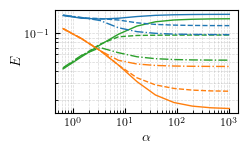

In [33]:
IMG_DIRECTORY = "./Assets/powerlaw"
if not os.path.exists(IMG_DIRECTORY):
    os.makedirs(IMG_DIRECTORY)


def save_plot(fig, name, formats=["pdf","jpg"], date=False):
    current_date = datetime.datetime.now().strftime("%Y-%m-%d")
    for f in formats:        
        path = "{}".format(name) + "_{}".format(current_date) + "." + f
        if not date:
            path = "{}".format(name) + "." + f
        fig.savefig(            
            os.path.join(IMG_DIRECTORY, path),
            format=f,
        )


def set_size(width, fraction=1, subplots=(1, 1)):
    if width == "thesis":
        width_pt = 426.79135
    elif width == "beamer":
        width_pt = 307.28987
    else:
        width_pt = width

    fig_width_pt = width_pt * fraction
    inches_per_pt = 1 / 72.27

    golden_ratio = (5**0.5 - 1) / 2

    fig_width_in = fig_width_pt * inches_per_pt
    fig_height_in = fig_width_in * (golden_ratio) * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


# width = 1.5 * 458.63788

multiplier = 1.25 
width = multiplier * 487.8225
width = 487.8225
# multiplier = 1.25
# width = multiplier * 1.5 * 234.8775

plt.style.use("latex_ready.mplstyle")

tuple_size = set_size(width, fraction=0.50)
tuple_size = (2.375,1.4)

multiplier = 0.9
second_multiplier = 0.7


# import Line2D for custom legend

fig, axes = plt.subplots(
    nrows=1,
    ncols=1,
    sharex=True,
    sharey=True,
    figsize=( tuple_size[0], tuple_size[1]),
    gridspec_kw={"hspace": 0,"wspace": 0},
)


# ICML adjustments
fig.subplots_adjust(left=0.2)
# fig.subplots_adjust(bottom=0.16)
fig.subplots_adjust(top=0.85)
fig.subplots_adjust(right=0.97)
# plt.subplots_adjust(bottom=0.30)



# Create a custom legend
custom_legend = []

linestyles = ["solid", "dashed", "dashdot", "dotted"]

for epsilon_idx, epsilon in enumerate(epsilons):

    # ax = axes[epsilon_idx]
    ax = axes

    if not epsilon in [0.0, 0.1, 0.2]:
        continue

    df_filtered = df.filter(pl.col("epsilon") == epsilon)
    df_filtered = df_filtered.sort(by="alpha")        

    adversarial_error = df_filtered["adversarial_generalization_errors"]
    generalization_error = df_filtered["generalization_error"]
    boundary_error = adversarial_error - generalization_error
    
    adversarial_lines = ax.plot(alphas, adversarial_error, linestyle=linestyles[epsilon_idx],color="C0")
    ax.plot(alphas, generalization_error, linestyle=linestyles[epsilon_idx],color="C1")
    ax.plot(alphas, boundary_error,linestyle=linestyles[epsilon_idx], color="C2")

    custom_legend.append(Line2D([0],[0],color="C0", linestyle=linestyles[epsilon_idx]))
    custom_legend.append(Line2D([0],[0],color="C1", linestyle=linestyles[epsilon_idx]))
    custom_legend.append(Line2D([0],[0],color="C2", linestyle=linestyles[epsilon_idx]))

    # ax.legend(title=f"$\\beta={1.5}$")
    # Set the major ticks to face inwards
    ax.tick_params(axis='both', which='major', direction='in')

    # Set the minor ticks to face inwards
    ax.tick_params(axis='both', which='minor', direction='in')


axes.set_xscale("log")
axes.set_yscale("log")


axes.set_ylabel(r"$E$", labelpad=2.0)
# axes.set_ylabel(r"$E$", labelpad=2.0)



axes.set_xlabel(r"$\alpha$", labelpad=2.0)
axes.grid(which="both", axis="both", alpha=0.5)



error_legend = []

error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{adv}}$",color="C0"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{gen}}$",color="C1"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{bound}}$",color="C2"))
# error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{CP}}$",color="C3"))

# epsilon_legend = []

# for idx, (beta, value) in enumerate(df_dict.items()):
#     epsilon_legend.append(Line2D([0],[0],color="black", linestyle=linestyles[idx], label=r"$\beta={}$".format(beta))) 


custom_legend = []

# mix the two legends
for idx in range(len(error_legend)):
    
    # custom_legend.append(epsilon_legend[idx+1])
    custom_legend.append(error_legend[idx])

# custom_legend.append(epsilon_legend[-1])

# Place the legend at the bottom of the figure
# fig.legend(handles=custom_legend, loc='upper center', ncol=3, handlelength=1)

save = True
if save:
    save_plot(
        fig,
        "powerlaw",
    )

plt.show()